In [20]:
import pandas as pd
import numpy as np

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

In [4]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [37]:
from sklearn import metrics

In [13]:
diamonds = pd.read_csv("data/train.csv")

In [14]:
diamonds.sample(5)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
27650,27650,0.29,Very Good,F,VVS1,60.5,57.0,4.31,4.34,2.61,6.594
24865,24865,1.01,Premium,H,VS2,61.6,59.0,6.45,6.47,3.98,8.550
25979,25979,0.63,Ideal,E,VS1,61.9,55.0,5.46,5.50,3.40,7.850
2804,2804,1.25,Very Good,F,SI2,58.0,63.0,7.16,7.06,4.13,8.674
7813,7813,2.29,Premium,H,SI2,62.5,58.0,8.43,8.37,5.25,9.779


In [15]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       40455 non-null  int64  
 1   carat    40455 non-null  float64
 2   cut      40455 non-null  object 
 3   color    40455 non-null  object 
 4   clarity  40455 non-null  object 
 5   depth    40455 non-null  float64
 6   table    40455 non-null  float64
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
 10  price    40455 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 3.4+ MB


In [ ]:
# no null values :)

In [16]:
set(diamonds.cut)

{'Fair', 'Good', 'Ideal', 'Premium', 'Very Good'}

In [17]:
set(diamonds.color)

{'D', 'E', 'F', 'G', 'H', 'I', 'J'}

In [18]:
set(diamonds.clarity)

{'I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'}

In [ ]:
# categorical columns are clean

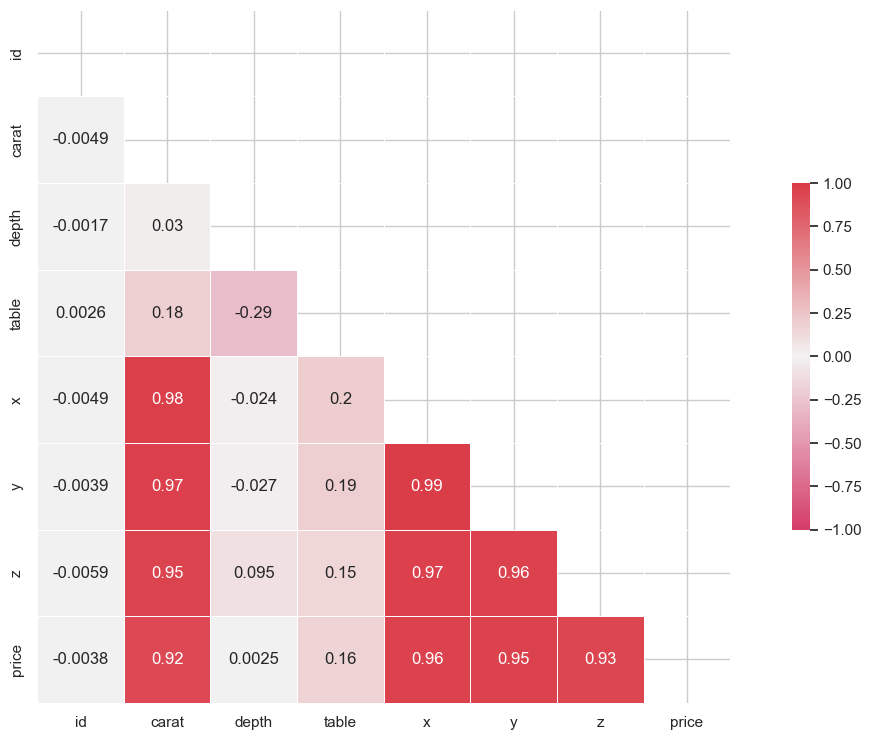

In [21]:
corr = diamonds.drop(columns={"cut","color","clarity"}).corr()
mask = np.triu(np.ones_like(corr, dtype=bool)) 
color_map = sns.diverging_palette(0, 10, as_cmap=True)
sns.heatmap(corr,  
            annot=True,
            mask = mask,
            cmap=color_map,
            square=True, 
            linewidth=0.5,
            vmax=1, #defining max range
            vmin=-1, #defining min range
            cbar_kws={"shrink": .5} #steps for the scale
);

In [ ]:
'''
Highly correlated variables:
x-y-z

'''

In [22]:
diamonds.drop(columns={"y","z"},inplace=True)

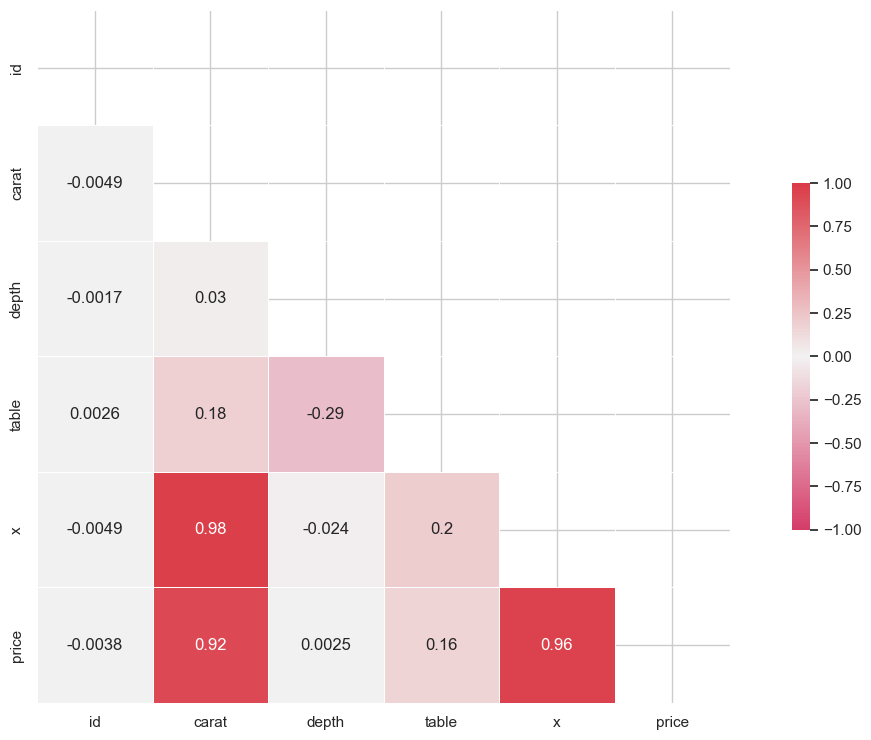

In [23]:
corr = diamonds.drop(columns={"cut","color","clarity"}).corr()
mask = np.triu(np.ones_like(corr, dtype=bool)) 
color_map = sns.diverging_palette(0, 10, as_cmap=True)
sns.heatmap(corr,  
            annot=True,
            mask = mask,
            cmap=color_map,
            square=True, 
            linewidth=0.5,
            vmax=1, #defining max range
            vmin=-1, #defining min range
            cbar_kws={"shrink": .5} #steps for the scale
);

In [ ]:
# it seems that price depends especially on carat and x values

In [29]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       40455 non-null  int64  
 1   carat    40455 non-null  float64
 2   cut      40455 non-null  object 
 3   color    40455 non-null  object 
 4   clarity  40455 non-null  object 
 5   depth    40455 non-null  float64
 6   table    40455 non-null  float64
 7   x        40455 non-null  float64
 8   price    40455 non-null  float64
dtypes: float64(5), int64(1), object(3)
memory usage: 2.8+ MB


## models to try

In [45]:
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.linear_model import Ridge, Lasso # regularization
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

In [46]:
models = {
    "lr": LinReg(),
    "ridge": Ridge(), #lr similar
    "lasso": Lasso(), # lr similar 
    "sgd": SGDRegressor(),
    "knn": KNeighborsRegressor(),
    "grad": GradientBoostingRegressor(),
    "svr": SVR() #potato chip
}

In [48]:
def more_models(X_train, y_train, X_test,y_test):
    for model in models.values():
        model.fit(X_train, y_train)
        
    for name, model in models.items():
        y_pred = model.predict(X_test)
        print(f"------------{name}------------\n")
        print(f"MAE, error: {metrics.mean_absolute_error(y_test, y_pred)}")
        print(f"MSE, error: {metrics.mean_squared_error(y_test, y_pred)}")
        print(f"RMSE, error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")
        print(f"r2: {metrics.r2_score(y_test, y_pred)}")
        print("\n")

### Feature Selection

In [ ]:
from sklearn.feature_selection import RFE

## keeping only x and carat

In [35]:
diamonds1 = diamonds[["carat","x","price"]]

In [36]:
from sklearn.model_selection import train_test_split

X = diamonds1.drop("price", axis=1)
y = diamonds1["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [49]:
more_models(X_train, y_train, X_test, y_test)

------------lr------------

MAE, error: 0.20817674268310424
MSE, error: 0.08222205294979484
RMSE, error: 0.2867438804051358
r2: 0.920767853076318


------------ridge------------

MAE, error: 0.20818572746162634
MSE, error: 0.08220872714406263
RMSE, error: 0.28672064303789263
r2: 0.9207806943051584


------------lasso------------

MAE, error: 0.8172386980766198
MSE, error: 0.8891931298695646
RMSE, error: 0.9429703759236366
r2: 0.14314130842278228


------------sgd------------

MAE, error: 0.2087310788574668
MSE, error: 0.08425057215280318
RMSE, error: 0.29025949106412213
r2: 0.918813098533417


------------knn------------

MAE, error: 0.20976099369670004
MSE, error: 0.07228188479545174
RMSE, error: 0.2688529054993673
r2: 0.9303465589757185


------------grad------------

MAE, error: 0.19504629583428199
MSE, error: 0.06222576634756145
RMSE, error: 0.24945092973881947
r2: 0.9400369987757525


------------svr------------

MAE, error: 0.1994928327393402
MSE, error: 0.06596809670262185
RMSE,

In [ ]:
# ora prova feature selection e cross_validation

## keeping all dataset